# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [73]:
df.columns = map(str.lower, df.columns)

In [74]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [75]:
df.set_index('linename', inplace=True)
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [76]:
df.reset_index(inplace=True)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [77]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [78]:
df['Num_Lines'] = df['linename'].str.len()
df.sort_values(by='Num_Lines', ascending=False)
df.tail()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,1
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,1
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,1
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,1
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348,1


In [57]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name.

In [79]:
def clean(col_name):
    cleaned = col_name.title()
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [80]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [81]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [82]:
#Your code here
#pd.to_datetime(df.Date)

In [83]:
#df

In [68]:
#pd.to_datetime(df.Date, format='%m/%d/%Y')

In [84]:
df.Date = pd.to_datetime(df.Date)
df.Date = df.Date.dt.day_name()

In [ ]:
df.Date = df.Date.dt.day_name()

In [86]:
df

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,16:00:00,REGULAR,6736349,2283384,7
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,Saturday,20:00:00,REGULAR,6736562,2283425,7
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,Sunday,00:00:00,REGULAR,6736683,2283460,7
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,Sunday,04:00:00,REGULAR,6736696,2283461,7
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,Sunday,08:00:00,REGULAR,6736705,2283483,7
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,Sunday,12:00:00,REGULAR,6736746,2283524,7


In [ ]:
x_values = ['Monday', "T", "W", "Th", "Fri", "Sat", "Sun"]

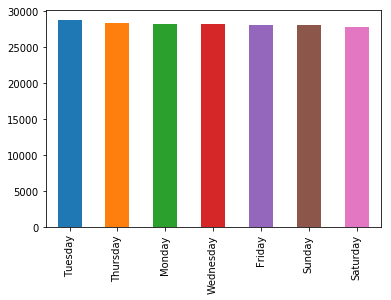

In [87]:
df.Date.value_counts().plot(kind = 'bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [89]:
mon = df.Date.value_counts()
mon

Tuesday      28772
Thursday     28447
Monday       28254
Wednesday    28203
Friday       28101
Sunday       28081
Saturday     27767
Name: Date, dtype: int64

# Drop a couple of columns

In [ ]:
# Your code here
df.drop